# Example of discrete random variable
- 비 모수적 기법 : 모집단의 확률 분포에 대해 어떠한 가정도 하지 않는 것
- 모수적 기법 : 모집단이 이와 같은 성질일 것이므로, 이러한 형태를 지닌 확률분포 일 것이다. 라고 가정을 하고 그 뒤에 확률분포의 기댓값이나 분산을 결정하는 소수의 파라미터를 추측하는 방법이다.

##
- Non-parametric methods: Methods that make no assumptions about the probability distribution of the population.
- Parametric methods: Methods that assume the population follows a certain type of probability distribution. Based on this assumption, they estimate a small number of parameters (e.g., mean or variance) that characterize the distribution.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [1]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])


def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

# Draw 확률변수의 확률 함수와 기댓값을 그리기 위한 함수
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 6.1 Bernoulli distribution
- 확률변수가 취할 수 있는 값이 0 또는 1이다
- 주사위에서 6이 나오면 1(성공), 그 외는 0(실패)

따라서 Bernoulli 분포의 성공 확률 
𝑝 = 1 / 6  p=1/6

확률변수 
X∼Bernoulli(1/6)
즉, **Bernoulli(5/6)**이 아니라 **Bernoulli(1/6)**이 맞습니다.

In [5]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f 

In [ ]:
p = 0.3
X = Bern(p) # p = 0.3을 따르는 확률 변수 X (성공확률))

In [8]:
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [7]:
check_prob(X)

expected value 0.3
variance 0.21


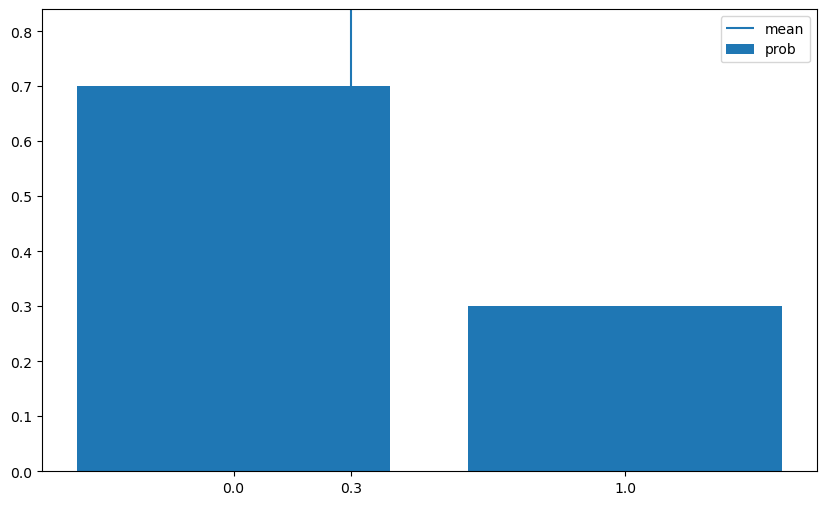

In [10]:
# The vertical line in the center represents the expected value of the random variable X
plot_prob(X)

In [11]:
rv = stats.bernoulli(p)

In [ ]:
# PMF
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [15]:
# list argument
rv.pmf([0,1])

array([0.7, 0.3])

In [16]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [18]:
rv.mean(), rv.var()

(0.300, 0.210)

## 6.2 Binominal distribution
- 성공 확률이 p인 베르누이 시행을 n번 했을 때 성공 횟수가 따르는 분포
- 파라미터 : 성공확률인 p와 시행 횟수인 n (2가지)

In [ ]:
from scipy.special import comb

def Bin(n, p) :
    x_set = np.arange(n+1)
    def f(x) :
        if x in x_set :
            return comb(n, x) * p**x * (1-p)**(n-x)
        else :
            return 0
    return x_set, f


In [20]:
n = 10
p = 0.3
X = Bin(n, p)

In [21]:
check_prob(X)

expected value 3.0
variance 2.1


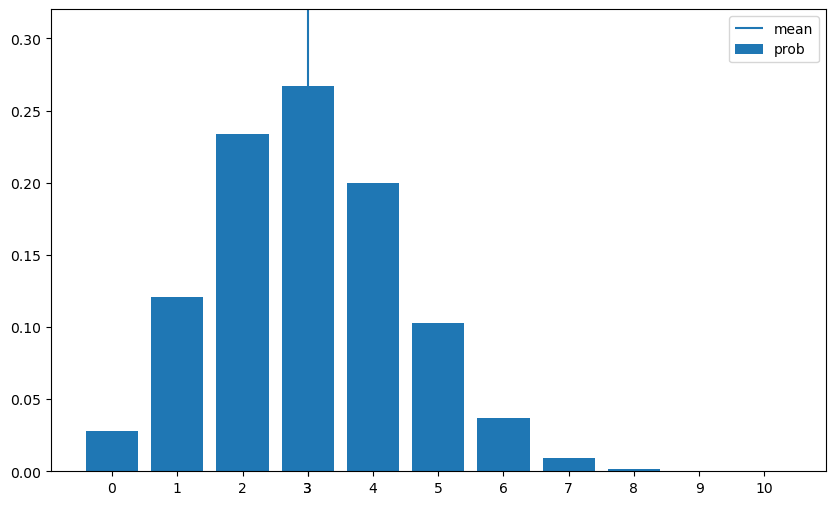

In [ ]:
# 기댓값이 정상이 되는 산 모양의 분포를 이룬다.
plot_prob(X)

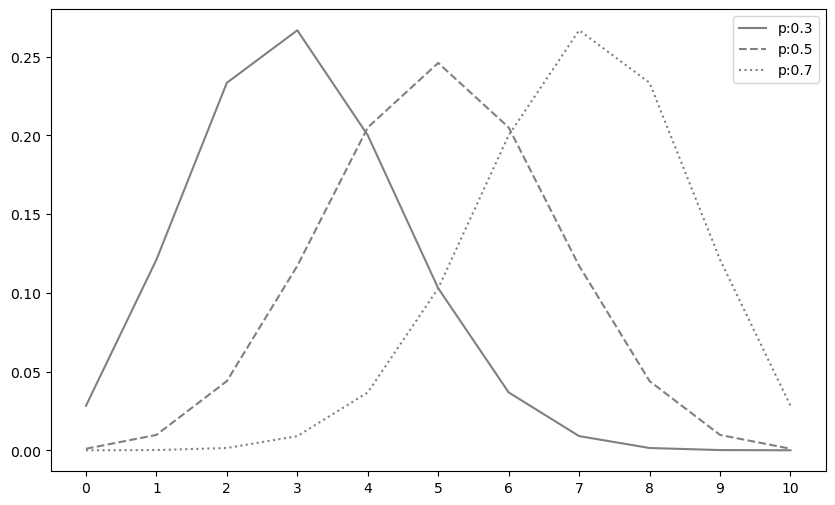

In [ ]:
# p = 0.7 → 한 번 시행에서 “성공할 확률”이 70%라는 의미
# x축 1~10 → n=10번 시행에서 성공 횟수
# x=8 → 10번 시행 중 정확히 8번 성공할 확률 = PMF 값

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()


## 6.3 Geometric distribution